In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data['Age'] = data['Age'].fillna(data['Age'].mean()) # 평균값으로 결측값  채우기

In [6]:
data = data[['Survived', 'Pclass','Sex', 'Age','SibSp', 'Parch', 'Embarked' ]]

In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [8]:
data['family'] = data['SibSp'] + data['Parch'] + 1

In [9]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,2
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,1


In [10]:
data.drop(['SibSp','Parch'], axis=1, inplace=True)

In [11]:
def age_dist(age):
    if 0 <= age < 10:
        return 'under 10s'
    elif 10 <= age < 20:
        return '10s'
    elif 20 <= age < 30:
        return '20s'
    elif 30 <= age < 40:
        return '30s'
    elif 40 <= age < 50:
        return '40s'
    elif 50 <= age < 60:
        return '50s'
    elif 60 <= age < 70:
        return '60s'
    elif 70 <= age < 80:
        return '70s'
    elif 80 <= age < 90:
        return '80s'

In [12]:
data['Age'] = data['Age'].apply(age_dist)

In [13]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,20s,S,2
1,1,1,female,30s,C,2
2,1,3,female,20s,S,1
3,1,1,female,30s,S,2
4,0,3,male,30s,S,1


In [14]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Survived,Pclass,family,Sex_male,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,Age_under 10s,Embarked_Q,Embarked_S
0,0,3,2,1,1,0,0,0,0,0,0,0,0,1
1,1,1,2,0,0,1,0,0,0,0,0,0,0,0
2,1,3,1,0,1,0,0,0,0,0,0,0,0,1
3,1,1,2,0,0,1,0,0,0,0,0,0,0,1
4,0,3,1,1,0,1,0,0,0,0,0,0,0,1


In [15]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [17]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=7)
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
print(accuracy_score(y_test, pred_dtc))
print(classification_report(y_test, pred_dtc))

0.770949720670391
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       110
           1       0.74      0.62      0.68        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179



In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, n_estimators = 1000, criterion ="entropy", n_jobs=-1, random_state=10)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

0.770949720670391
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       110
           1       0.74      0.62      0.68        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179



# tensorflow Sequential API를 사용한 순차적 모델
* 순서대로 은닉층을 쌓음??
* 데이터를 하나만 넣을 수 있다.

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [46]:
X_train.shape[1] # index1을 하면 컬럼 개수가 나온다.

13

In [21]:
# 딥러닝 신경망 모델 정의
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu')) #input_dim: 독립변수 컬럼 수 X: 입력층
model.add(Dense(60, activation='relu')) # 은닉층1
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu')) #은닉층2
model.add(Dense(1, activation='sigmoid')) # 출력층 sigmoid : 이진 분류

Dense(30,--> 여기서 30의 의미는 은닉층 안에 노드 수를 의미함.

In [22]:
# 신경망 훈련 시 사용할 파라미터 세팅
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 60)                1860      
                                                                 
 dense_2 (Dense)             (None, 30)                1830      
                                                                 
 dense_3 (Dense)             (None, 15)                465       
                                                                 
 dense_4 (Dense)             (None, 1)                 16        
                                                                 
Total params: 4,591
Trainable params: 4,591
Non-trainable params: 0
_________________________________________________________________


loss="binary_crossentropy"loss를 계산. 정답과 실제값의 오차가 얼마나 있는지. 오차가 작을수록 정답에 가까우니까 좋은거야. 
분류분석일 경우 : 종속변수의 카테고리가 2개이면 loss="binary_crossentropy" (이진분류일 때는) / 
종속변수의 카테고리가 2개 이상이면(다중분류 y가 3개 이상 loss="category_crossentropy" 
만약 종속변수가 연속형이면?
loss="MSE" loss값에 무엇을 넣느냐에 따라서 분류분석도, 회귀분석도 할 수 있음.

In [23]:
history = model.fit(X_train, y_train, epochs=200, batch_size=40, validation_data=(X_test, y_test))

Epoch 1/200
18/18 [==============================] - 1s 12ms/step - loss: 0.6450 - accuracy: 0.6067 - val_loss: 0.6114 - val_accuracy: 0.6145
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.6166 - val_loss: 0.5986 - val_accuracy: 0.6257
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5692 - accuracy: 0.6812 - val_loss: 0.5856 - val_accuracy: 0.6983
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5257 - accuracy: 0.7626 - val_loss: 0.5715 - val_accuracy: 0.7374
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4767 - accuracy: 0.8076 - val_loss: 0.5589 - val_accuracy: 0.7486
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.8090 - val_loss: 0.5633 - val_accuracy: 0.7374
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.8216 - val_loss: 0.5533 - val_accuracy: 0.7374
Epoch 8/200


Epoch 59/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3314 - accuracy: 0.8581 - val_loss: 0.5696 - val_accuracy: 0.7765
Epoch 60/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3271 - accuracy: 0.8624 - val_loss: 0.5522 - val_accuracy: 0.7989
Epoch 61/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3273 - accuracy: 0.8624 - val_loss: 0.5537 - val_accuracy: 0.7989
Epoch 62/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3214 - accuracy: 0.8652 - val_loss: 0.5696 - val_accuracy: 0.7765
Epoch 63/200
18/18 [==============================] - 0s 4ms/step - loss: 0.3213 - accuracy: 0.8638 - val_loss: 0.5589 - val_accuracy: 0.7989
Epoch 64/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8581 - val_loss: 0.5774 - val_accuracy: 0.7709
Epoch 65/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.8539 - val_loss: 0.5642 - val_accuracy: 0.7765
Epoch 

18/18 [==============================] - 0s 4ms/step - loss: 0.3036 - accuracy: 0.8694 - val_loss: 0.6614 - val_accuracy: 0.7877
Epoch 174/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2907 - accuracy: 0.8708 - val_loss: 0.6658 - val_accuracy: 0.7877
Epoch 175/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2935 - accuracy: 0.8694 - val_loss: 0.6864 - val_accuracy: 0.7821
Epoch 176/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2959 - accuracy: 0.8638 - val_loss: 0.6537 - val_accuracy: 0.7877
Epoch 177/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2966 - accuracy: 0.8694 - val_loss: 0.6841 - val_accuracy: 0.7821
Epoch 178/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2946 - accuracy: 0.8708 - val_loss: 0.6801 - val_accuracy: 0.7709
Epoch 179/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2964 - accuracy: 0.8680 - val_loss: 0.6898 - val_accuracy: 0.7709
Epoch 180/200

# 딥러닝 모델 성능평가
* 딥러닝에서 모델의 정확성을 보는 지표는 loss
* 보통 loss가 낮으면 accuracy가 올라간다. 하지만 가끔 비례하지 않을 때도 있음.
* 두 지표간 차이가 있을 경우 loss가 낮은 모델이 우수한 모델

In [24]:
score = model.evaluate(X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

6/6 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.7765
test loss 0.6738370656967163
test accuracy 0.7765362858772278


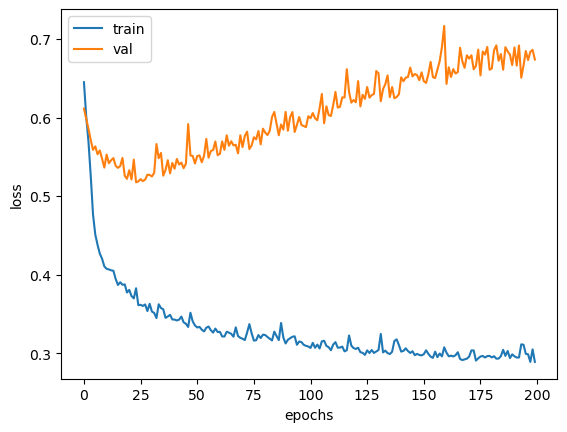

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

epochs=400, batch_size=25

* train 이 떨어지는데 val이 올라가면 과적합이 일어나고있음을 알 수 있음.

In [26]:
score = model.evaluate(X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

6/6 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.7765
test loss 0.6738370656967163
test accuracy 0.7765362858772278


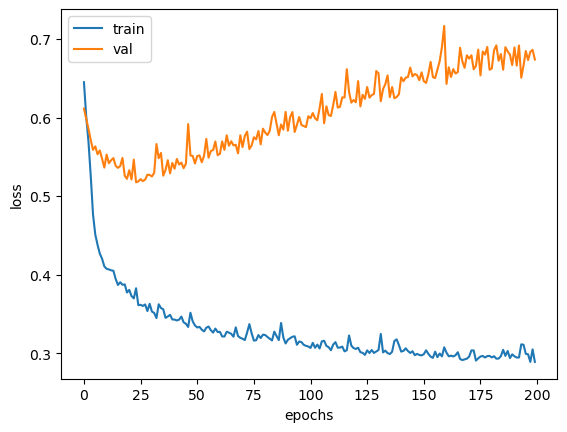

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

epochs=200, batch_size=200

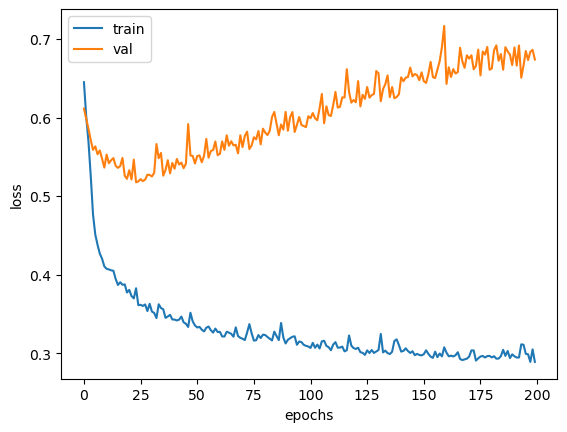

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

epochs=200, batch_size=200

층을 다르게 쌓음
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu')) #input_dim: 독립변수 컬럼 수 X: 입력층
model.add(Dense(60, activation='relu')) 
model.add(Dense(30, activation='relu')) ----> 얘를 추가시킴.
model.add(Dense(15, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) # 출력층 sigmoid : 이진 분류

softmax:다중분류 y가 3개 이상

그래프를 보니 epoch이 40정도가 가장 적당하다는 걸알 수 있어.

In [29]:
pred = model.predict(X_test)
print(pred.shape)

6/6 [==============================] - 0s 617us/step
(179, 1)


In [30]:
pred # 컬럼이 한개만 있는 데이터프레임 형식

array([[8.5404098e-02],
       [2.9340280e-02],
       [2.4263756e-01],
       [4.9156569e-02],
       [9.9635977e-01],
       [9.9922198e-01],
       [3.9953529e-03],
       [2.4263756e-01],
       [8.3148025e-02],
       [9.9374336e-01],
       [8.1378537e-01],
       [1.9534158e-04],
       [9.9824983e-01],
       [9.9937612e-01],
       [2.4263756e-01],
       [6.6950873e-02],
       [2.4366429e-01],
       [8.3148025e-02],
       [1.4447146e-02],
       [1.4761722e-01],
       [1.3215686e-01],
       [8.5404098e-02],
       [7.3860377e-01],
       [9.2346622e-03],
       [1.7252719e-01],
       [9.9953336e-01],
       [9.9824983e-01],
       [7.0810832e-02],
       [2.6731625e-01],
       [9.8941171e-01],
       [9.9993300e-01],
       [8.1378531e-01],
       [6.6950873e-02],
       [2.4276289e-01],
       [2.4263756e-01],
       [2.4366429e-01],
       [9.9840897e-01],
       [2.4263756e-01],
       [2.3122216e-03],
       [4.5537557e-02],
       [1.7252719e-01],
       [9.995333

In [31]:
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x >= 0.5 else 0)

In [32]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.776536312849162
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       110
           1       0.75      0.64      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



# Tensorflow Functional API를 이용한 함수형 모델(가장 많이 사용)
* Sequential API는 단순이 층을 여러개 쌓는 형태라 복잡한 형태의 모델 생성에 한계가 있음.
* Functional API는 입력층과 출력층을 사용자가 직접 정의 가능(데이터를 2개 이상 넣을 수 있다.)
* 다중입력(multi-input), 다중 출력(multi-output) 등 복잡한 모델을 정의할 수 있음.
* Input(shape=(독립변수 수, ))함수를 정의해야 해: 입력층 정의
* 이전 층을 다음 층의 입력으로 사용
* model()에 입력과 출력 정의

In [33]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [34]:
inputs = Input(shape=(X_train.shape[1], )) # 입력층 정의 (컬럼(특성,Feature) 14개를 입력으로 받음.)
x = Dense(30, activation='relu')(inputs) # 은닉층 1번
x = Dense(60, activation='relu')(x) # 은닉층 2번
x = Dense(15, activation='relu')(x) # 은닉층3번
x = Dense(1, activation='sigmoid')(x) # 출력층
model = Model(inputs, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_5 (Dense)             (None, 30)                420       
                                                                 
 dense_6 (Dense)             (None, 60)                1860      
                                                                 
 dense_7 (Dense)             (None, 15)                915       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 3,211
Trainable params: 3,211
Non-trainable params: 0
_________________________________________________________________


Epoch 1/400
8/8 [==============================] - 1s 24ms/step - loss: 0.6712 - accuracy: 0.6152 - val_loss: 0.6595 - val_accuracy: 0.6145
Epoch 2/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6442 - accuracy: 0.6166 - val_loss: 0.6501 - val_accuracy: 0.6145
Epoch 3/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6256 - accuracy: 0.6166 - val_loss: 0.6442 - val_accuracy: 0.6089
Epoch 4/400
8/8 [==============================] - 0s 7ms/step - loss: 0.6053 - accuracy: 0.6292 - val_loss: 0.6375 - val_accuracy: 0.6034
Epoch 5/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5858 - accuracy: 0.6334 - val_loss: 0.6307 - val_accuracy: 0.6089
Epoch 6/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5641 - accuracy: 0.6924 - val_loss: 0.6270 - val_accuracy: 0.6257
Epoch 7/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5455 - accuracy: 0.7247 - val_loss: 0.6226 - val_accuracy: 0.6313
Epoch 8/400
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.3410 - accuracy: 0.8624 - val_loss: 0.5452 - val_accuracy: 0.7709
Epoch 118/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3369 - accuracy: 0.8652 - val_loss: 0.5444 - val_accuracy: 0.8101
Epoch 119/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3421 - accuracy: 0.8567 - val_loss: 0.5425 - val_accuracy: 0.7933
Epoch 120/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3474 - accuracy: 0.8469 - val_loss: 0.5462 - val_accuracy: 0.7877
Epoch 121/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3439 - accuracy: 0.8553 - val_loss: 0.5284 - val_accuracy: 0.8101
Epoch 122/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3405 - accuracy: 0.8567 - val_loss: 0.5287 - val_accuracy: 0.7709
Epoch 123/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3395 - accuracy: 0.8624 - val_loss: 0.5337 - val_accuracy: 0.7989
Epoch 124/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.3188 - accuracy: 0.8624 - val_loss: 0.6000 - val_accuracy: 0.7877
Epoch 234/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3132 - accuracy: 0.8652 - val_loss: 0.5980 - val_accuracy: 0.7933
Epoch 235/400
8/8 [==============================] - 0s 4ms/step - loss: 0.3149 - accuracy: 0.8638 - val_loss: 0.5953 - val_accuracy: 0.7821
Epoch 236/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3151 - accuracy: 0.8596 - val_loss: 0.5947 - val_accuracy: 0.7877
Epoch 237/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3411 - accuracy: 0.8483 - val_loss: 0.6021 - val_accuracy: 0.7821
Epoch 238/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3168 - accuracy: 0.8666 - val_loss: 0.5929 - val_accuracy: 0.7989
Epoch 239/400
8/8 [==============================] - 0s 7ms/step - loss: 0.3241 - accuracy: 0.8553 - val_loss: 0.5885 - val_accuracy: 0.7709
Epoch 240/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.3044 - accuracy: 0.8708 - val_loss: 0.6422 - val_accuracy: 0.7821
Epoch 350/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3029 - accuracy: 0.8694 - val_loss: 0.6428 - val_accuracy: 0.7877
Epoch 351/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3099 - accuracy: 0.8624 - val_loss: 0.6250 - val_accuracy: 0.7933
Epoch 352/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3064 - accuracy: 0.8652 - val_loss: 0.6287 - val_accuracy: 0.7654
Epoch 353/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3066 - accuracy: 0.8694 - val_loss: 0.6347 - val_accuracy: 0.7709
Epoch 354/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3035 - accuracy: 0.8694 - val_loss: 0.6385 - val_accuracy: 0.7821
Epoch 355/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3016 - accuracy: 0.8694 - val_loss: 0.6433 - val_accuracy: 0.7877
Epoch 356/400
8/8 [========

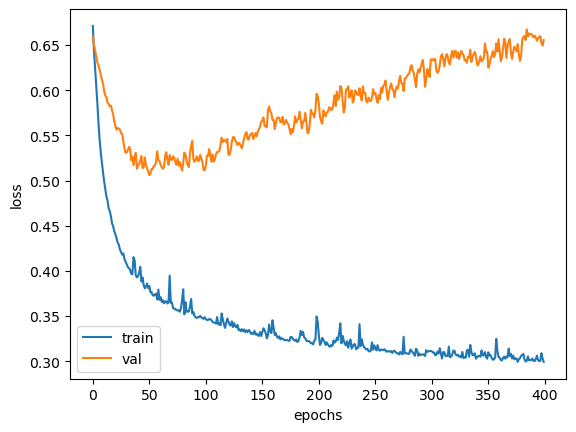

In [35]:
## 신경망 훈련 시 사용할 파라미터 세팅
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 훈련한 거를 history변수에 담아주기(나중에 그래프 그려보려구)
history=model.fit(X_train, y_train, epochs=400, batch_size=100, validation_data=(X_test, y_test))
# 딥러닝 모델 성능평가
score=model.evaluate(X_test, y_test)
print('test_loss', score[0])
print('test_accuracy', score[1])
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x > 0.5 else 0)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
# 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

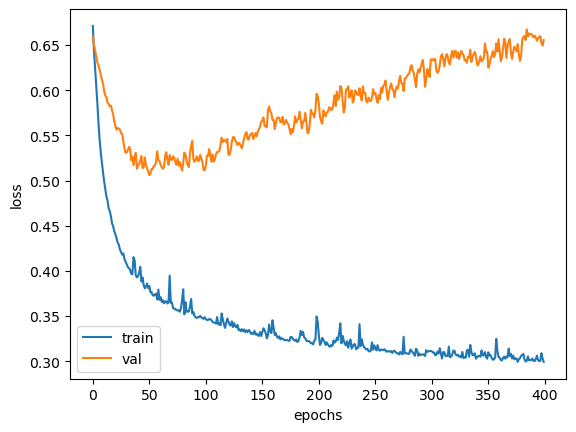

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# Model Subclassing API로 모델 만들기
* class 형태의 모델 정의 방법
* tf.keras.Model을 상속받아 작성한다.

In [37]:
class Titanic(tf.keras.Model):
    
    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(30, activation='relu')
        self.dense2 = tf.keras.layers.Dense(60, activation='relu')
        self.dense3 = tf.keras.layers.Dense(15, activation='relu')
        self.classifier = tf.keras.layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

In [38]:
model = Titanic() # 클래스 사용하는 방법은 변수에 넣어주기.

Epoch 1/400
8/8 [==============================] - 1s 24ms/step - loss: 0.6737 - accuracy: 0.6152 - val_loss: 0.6543 - val_accuracy: 0.6145
Epoch 2/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6530 - accuracy: 0.6166 - val_loss: 0.6405 - val_accuracy: 0.6145
Epoch 3/400
8/8 [==============================] - 0s 7ms/step - loss: 0.6389 - accuracy: 0.6166 - val_loss: 0.6304 - val_accuracy: 0.6145
Epoch 4/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6257 - accuracy: 0.6166 - val_loss: 0.6231 - val_accuracy: 0.6145
Epoch 5/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6126 - accuracy: 0.6166 - val_loss: 0.6155 - val_accuracy: 0.6145
Epoch 6/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5989 - accuracy: 0.6166 - val_loss: 0.6081 - val_accuracy: 0.6145
Epoch 7/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5845 - accuracy: 0.6152 - val_loss: 0.6005 - val_accuracy: 0.6257
Epoch 8/400
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.3660 - accuracy: 0.8469 - val_loss: 0.5299 - val_accuracy: 0.7709
Epoch 118/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3703 - accuracy: 0.8511 - val_loss: 0.5199 - val_accuracy: 0.7709
Epoch 119/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3701 - accuracy: 0.8469 - val_loss: 0.5164 - val_accuracy: 0.7709
Epoch 120/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3689 - accuracy: 0.8441 - val_loss: 0.5247 - val_accuracy: 0.7709
Epoch 121/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3722 - accuracy: 0.8469 - val_loss: 0.5177 - val_accuracy: 0.7709
Epoch 122/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3669 - accuracy: 0.8455 - val_loss: 0.5208 - val_accuracy: 0.7709
Epoch 123/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3651 - accuracy: 0.8413 - val_loss: 0.5234 - val_accuracy: 0.7709
Epoch 124/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.3369 - accuracy: 0.8596 - val_loss: 0.5534 - val_accuracy: 0.7877
Epoch 234/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3354 - accuracy: 0.8596 - val_loss: 0.5446 - val_accuracy: 0.7654
Epoch 235/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3351 - accuracy: 0.8624 - val_loss: 0.5422 - val_accuracy: 0.7765
Epoch 236/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3435 - accuracy: 0.8596 - val_loss: 0.5598 - val_accuracy: 0.8101
Epoch 237/400
8/8 [==============================] - 0s 7ms/step - loss: 0.3365 - accuracy: 0.8596 - val_loss: 0.5452 - val_accuracy: 0.7598
Epoch 238/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3387 - accuracy: 0.8581 - val_loss: 0.5368 - val_accuracy: 0.7598
Epoch 239/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3354 - accuracy: 0.8596 - val_loss: 0.5276 - val_accuracy: 0.7765
Epoch 240/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.3156 - accuracy: 0.8624 - val_loss: 0.5808 - val_accuracy: 0.7654
Epoch 350/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3162 - accuracy: 0.8624 - val_loss: 0.5860 - val_accuracy: 0.7877
Epoch 351/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3148 - accuracy: 0.8708 - val_loss: 0.5903 - val_accuracy: 0.7877
Epoch 352/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3161 - accuracy: 0.8666 - val_loss: 0.5822 - val_accuracy: 0.7765
Epoch 353/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3155 - accuracy: 0.8652 - val_loss: 0.5891 - val_accuracy: 0.7765
Epoch 354/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3175 - accuracy: 0.8680 - val_loss: 0.5927 - val_accuracy: 0.7765
Epoch 355/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3148 - accuracy: 0.8736 - val_loss: 0.5939 - val_accuracy: 0.7654
Epoch 356/400
8/8 [========

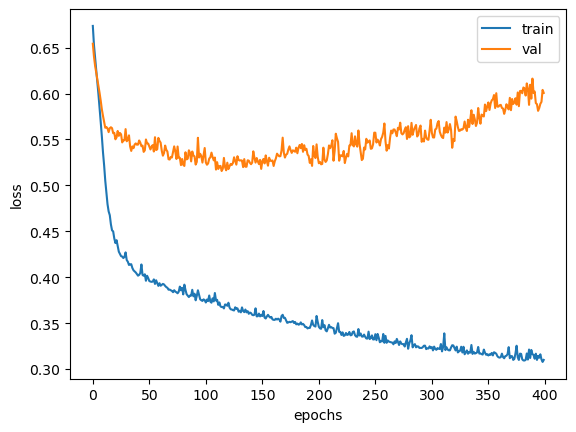

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=400, batch_size=100, validation_data=(X_test, y_test))
score=model.evaluate(X_test, y_test)
print('test_loss', score[0])
print('test_accuracy', score[1])
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x > 0.5 else 0)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()